https://towardsdatascience.com/a-visual-guide-to-learning-rate-schedulers-in-pytorch-24bbb262c863

Why learning_rate scheduler
- Help the neural network to converge quickly to an optimum
- Help the neural network to converge to a possibly more optimal solution (reduce the chances of neural networks being stuck at optimal solutions)
- Automatically reduce the learning rate as the batch_size or epoch increases

In [8]:
LEARNING_RATE = 0.01
EPOCHS = 4

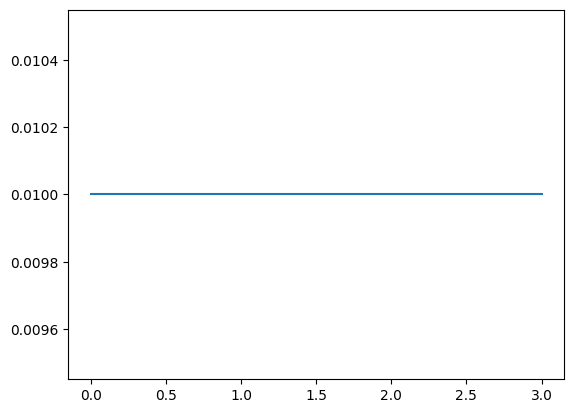

In [14]:
import torch
import torch.nn
%matplotlib inline
import matplotlib.pyplot as plt

model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

learning_rates = []
for i in range(EPOCHS):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]['lr'])
    
fig = plt.plot(learning_rates)

# StepLR
- Decays the learning rate of each parameter group by gamma **every step_size epochs**. Notice that such decay can happen simultaneously with other changes to the learning rate from outside this scheduler. When last_epoch=-1, sets initial lr as lr.


Parameters:
optimizer (Optimizer) – Wrapped optimizer.

step_size (int) – Period of learning rate decay.

gamma (float) – Multiplicative factor of learning rate decay. Default: 0.1.

last_epoch (int) – The index of last epoch. Default: -1.

verbose (bool) – If True, prints a message to stdout for each update. Default: False.

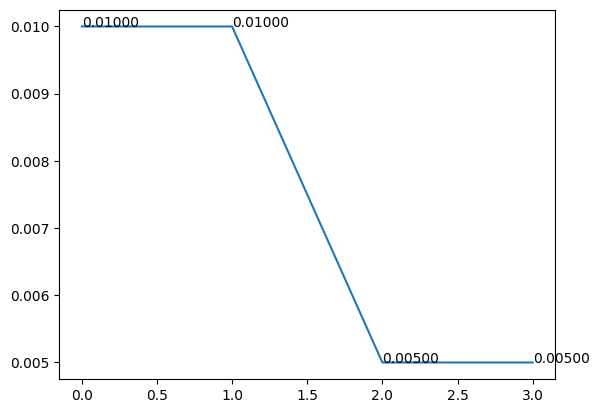

In [71]:
from torch.optim.lr_scheduler import StepLR


model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(), lr = LEARNING_RATE)

scheduler = StepLR(optimizer, 
                   step_size = 2, # Period of learning rate decay
                   gamma = 0.5) # Multiplicative factor of learning rate decay

learning_rates = []
for i in range(EPOCHS):
    optimizer.step() ## we have this optimizer.step() to prevent the warning when doing the experiment
    learning_rates.append(optimizer.param_groups[0]['lr'])
    scheduler.step()
    
def plot_lr(learning_rates):
    fig = plt.plot(learning_rates)
    for x,y in zip(range(len(learning_rates)), learning_rates):
        plt.text(x = x, y = y, s = '{:.5f}'.format(y))
    return

plot_lr(learning_rates)

Note that if we set step == 1, then it will be ExponentialLR

# MutliStepLR
- Decays the learning rate of each parameter group by gamma once the **number of epoch** reaches one of the **milestones**. Notice that such decay can happen simultaneously with other changes to the learning rate from outside this scheduler. When last_epoch=-1, sets initial lr as lr.

Parameters:
optimizer (Optimizer) – Wrapped optimizer.

milestones (list) – List of epoch indices. Must be increasing.

gamma (float) – Multiplicative factor of learning rate decay. Default: 0.1.

last_epoch (int) – The index of last epoch. Default: -1.

verbose (bool) – If True, prints a message to stdout for each update. Default: False.

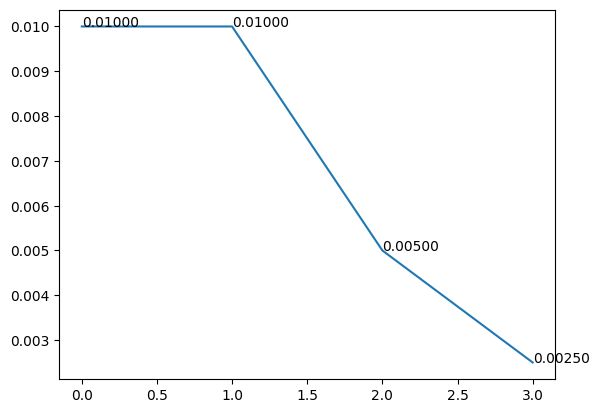

In [38]:
from torch.optim.lr_scheduler import MultiStepLR

model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

scheduler = MultiStepLR(optimizer, 
                       milestones = [2,3],
                       gamma=0.5)
learning_rates = []
for i in range(EPOCHS):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]['lr'])
    scheduler.step()
    
plot_lr(learning_rates)

# Constant LR
- Decays the learning rate of each parameter group by a small constant factor until the number of epoch reaches a pre-defined milestone: total_iters. Notice that such decay can happen simultaneously with other changes to the learning rate from outside this scheduler. When last_epoch=-1, sets initial lr as lr.

Parameters:
optimizer (Optimizer) – Wrapped optimizer.

factor (float) – The number we multiply learning rate until the milestone. Default: 1./3.

total_iters (int) – The number of steps that the scheduler decays the learning rate. Default: 5.

last_epoch (int) – The index of the last epoch. Default: -1.

verbose (bool) – If True, prints a message to stdout for each update. Default: False.

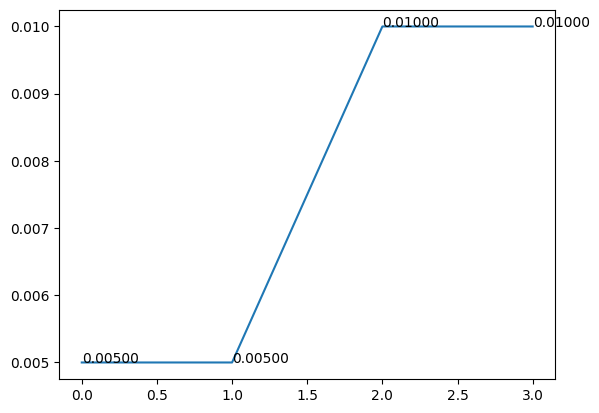

In [62]:
from torch.optim.lr_scheduler import ConstantLR

model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(), lr = LEARNING_RATE)
scheduler = ConstantLR(optimizer, 
                       factor = 0.5,
                       total_iters=2)
learning_rates = []

for i in range(EPOCHS):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]['lr'])
    scheduler.step()
    
plot_lr(learning_rates)

As you might have already noticed, if your starting factor is smaller than 1, this learning rate scheduler increases the learning rate over the course of the training process instead of decreasing it.

- Notice that the start of the learning rate is factor * learning_rate for the total_iters, and then it goes back to the original learning rate again

# LinearLR

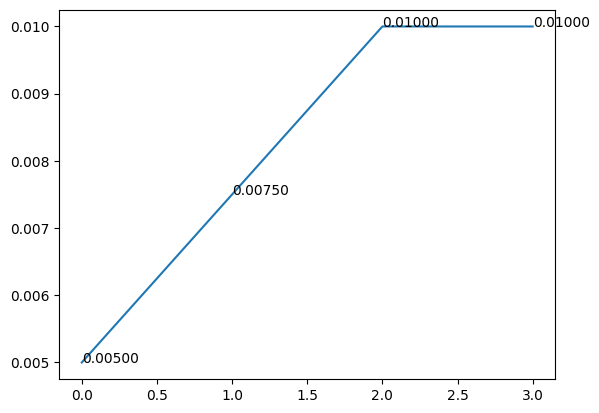

In [133]:
from torch.optim.lr_scheduler import LinearLR

model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(), lr = LEARNING_RATE)
scheduler = LinearLR(optimizer,
                     start_factor=0.5,
                     total_iters = 2)

learning_rates =[]
for i in range(EPOCHS):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]['lr'])
    
    scheduler.step()
plot_lr(learning_rates)

The LinearLR — similarly to the ConstantLR— also reduces the learning rate by a multiplicative factor at the beginning of the training. But it linearly increases the learning rate over a defined number of training steps until it reaches its originally set learning rate.

# ExponentialLR
- Decays the learning rate of each parameter group by gamma every epoch. When last_epoch=-1, sets initial lr as lr.
- The ExponentialLR reduces learning rate by a multiplicative factor at every training step.

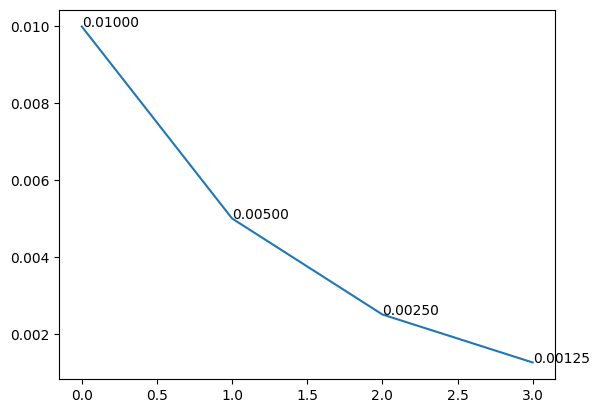

In [70]:
from torch.optim.lr_scheduler import ExponentialLR

model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
scheduler = ExponentialLR(optimizer, 
                         gamma =0.5)
learning_rates = []
for i in range(EPOCHS):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]['lr'])
    scheduler.step()
plot_lr(learning_rates)

# PolynomialLR
- Decays the learning rate of each parameter group using a polynomial function in the given total_iters.

Decays the learning rate of each parameter group using a polynomial function in the given total_iters. When last_epoch=-1, sets initial lr as lr.

Parameters:
optimizer (Optimizer) – Wrapped optimizer.

total_iters (int) – The number of steps that the scheduler decays the learning rate. Default: 5.

power (int) – The power of the polynomial. Default: 1.0.

verbose (bool) – If True, prints a message to stdout for each update. Default: False.

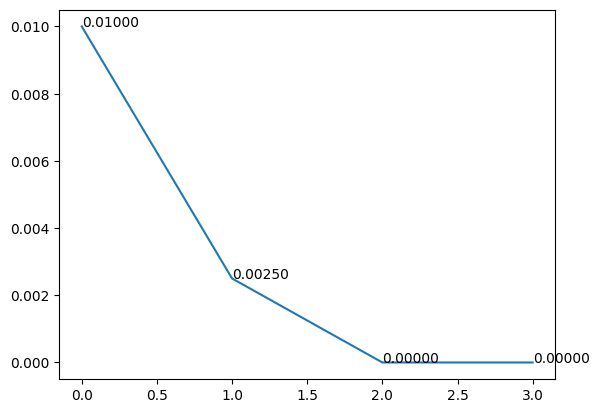

In [75]:
from torch.optim.lr_scheduler import PolynomialLR

model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
scheduler = PolynomialLR(optimizer, 
                         total_iters =2,
                         power=2)
learning_rates = []
for i in range(EPOCHS):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]['lr'])
    scheduler.step()
plot_lr(learning_rates)

# CosineAnnealingLR

- Set the learning rate of each parameter group using a cosine annealing schedule, 
- 
The CosineAnnealingLR reduces learning rate by a cosine function.
While you could technically schedule the learning rate adjustments to follow multiple periods, the idea is to decay the learning rate over half a period for the maximum number of iterations.


Parameters:
optimizer (Optimizer) – Wrapped optimizer.

T_max (int) – Maximum number of iterations. (before it grows back to its learning rate)

eta_min (float) – Minimum learning rate. Default: 0.

last_epoch (int) – The index of last epoch. Default: -1.

verbose (bool) – If True, prints a message to stdout for each update. Default: False

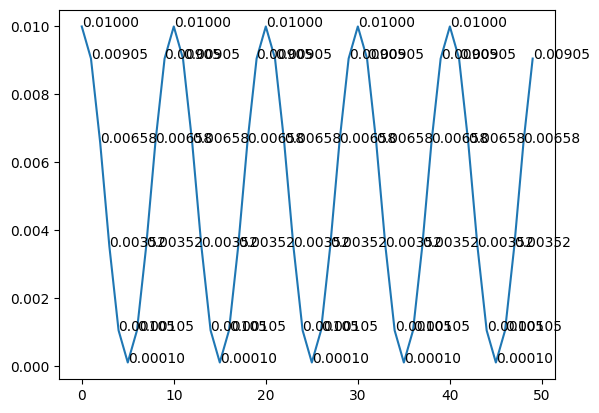

In [81]:


from torch.optim.lr_scheduler import CosineAnnealingLR

model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

scheduler = CosineAnnealingLR(optimizer,
                              T_max = 5, # Maximum number of iterations before it grows back to the original learning rate
                             eta_min = 1e-4) # Minimum learning rate.

learning_rates = []
for i in range(50):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]['lr'])
    scheduler.step()
plot_lr(learning_rates)

# CosineAnnealingWarmRestartsLR
- Set the learning rate of each parameter group using a cosine annealing schedule
- The CosineAnnealingWarmRestarts is similar to the cosine annealing schedule. However, it allows you to restart the LR schedule with the initial LR at, e.g., each epoch.
- **Step could be called after every batch update**

Parameters:
optimizer (Optimizer) – Wrapped optimizer.

T_0 (int) – Number of iterations for the first restart.

T_mult (int, optional) – A factor increases after a restart. Default: 1.

eta_min (float, optional) – Minimum learning rate. Default: 0.

last_epoch (int, optional) – The index of last epoch. Default: -1.

verbose (bool) – If True, prints a message to stdout for each update. Default: False.

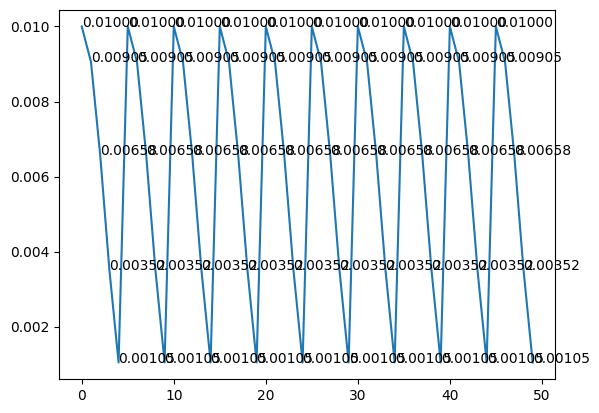

In [83]:
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts

model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

scheduler = CosineAnnealingWarmRestarts(optimizer,
                              T_0 = 5, # Maximum number of iterations before it grows back to the original learning rate
                            eta_min = 1e-4,) # Minimum learning rate.

learning_rates = []
for i in range(50):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]['lr'])
    scheduler.step()
plot_lr(learning_rates)

This is called a warm restart and was introduced in 2017 [1]. Increasing the LR causes the model to diverge. However, this intentional divergence enables the model to escape local minima and find an even better global minimum.

# CyclicLR
- The CyclicLR adjusted the learning rate according to a cyclical learning rate policy, which is based on the concept of warm restarts which we just discussed in the previous section. In PyTorch there are three built-in policies.

Cyclical learning rate policy changes the learning rate after every batch. **step should be called after a batch has been used for training.**

This class has three built-in policies, as put forth in the paper:

“triangular”: A basic triangular cycle without amplitude scaling.

“triangular2”: A basic triangular cycle that scales initial amplitude by half each cycle.

“exp_range”: A cycle that scales initial amplitude by 
gamma_cycle iterations at each cycle iteration.

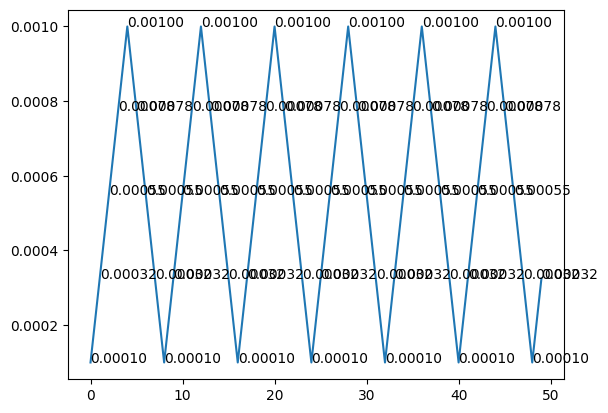

In [84]:
from torch.optim.lr_scheduler import CyclicLR

model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

scheduler = CyclicLR(optimizer, 
                     base_lr = 0.0001, # Initial learning rate which is the lower boundary in the cycle for each parameter group
                     max_lr = 1e-3, # Upper learning rate boundaries in the cycle for each parameter group
                     step_size_up = 4, # Number of training iterations in the increasing half of a cycle
                     mode = "triangular")

learning_rates = []
for i in range(50):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]['lr'])
    scheduler.step()
plot_lr(learning_rates)

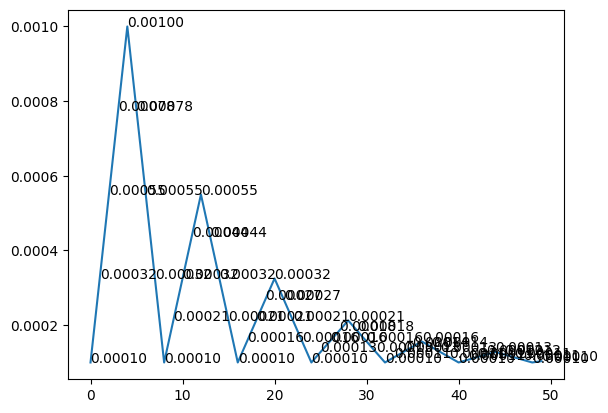

In [87]:
model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

scheduler = CyclicLR(optimizer, 
                     base_lr = 0.0001, # Initial learning rate which is the lower boundary in the cycle for each parameter group
                     max_lr = 1e-3, # Upper learning rate boundaries in the cycle for each parameter group
                     step_size_up = 4, # Number of training iterations in the increasing half of a cycle
                     mode = "triangular2")

learning_rates = []
for i in range(50):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]['lr'])
    scheduler.step()
plot_lr(learning_rates)

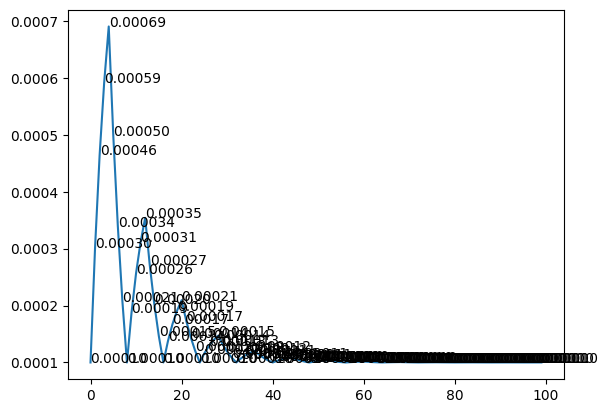

In [94]:
model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

scheduler = CyclicLR(optimizer, 
                     base_lr = 0.0001, # Initial learning rate which is the lower boundary in the cycle for each parameter group
                     max_lr = 1e-3, # Upper learning rate boundaries in the cycle for each parameter group
                     step_size_up = 4, # Number of training iterations in the increasing half of a cycle
                     mode = "exp_range", gamma=0.9)

learning_rates = []
for i in range(100):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]['lr'])
    scheduler.step()
plot_lr(learning_rates)

not that for exp_range, we need to change `gamma` in the scheduler

# OneCycleLR 
The OneCycleLR reduces learning rate according to the 1cycle learning rate policy, which was introduced in a paper in 2017 [3].

In contrast to many other learning rate schedulers, the learning rate is not only decreased over the training process. Instead, the learning rate increases from an initial learning rate to some maximum learning rate and then decreases again.

The 1cycle learning rate policy changes the learning rate after every batch. **step should be called after a batch has been used for training.**

- Note that steps_per_epoch must be min(len of dataloader). This means that at the end of the dataloader, the LR becomes 0.
- if steps_per_epoch is more than len of dataloader, then the learning rate will not at the initial lr


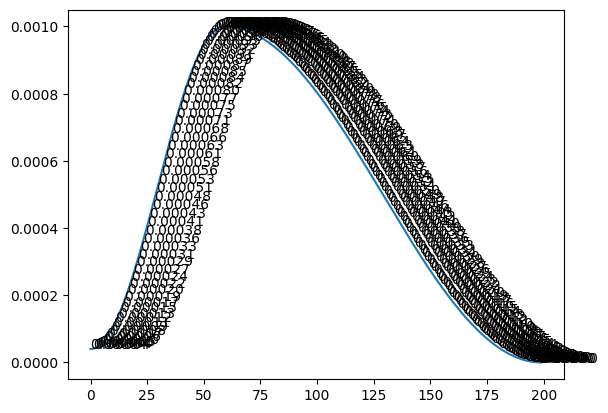

In [125]:
from torch.optim.lr_scheduler import OneCycleLR

model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

scheduler = OneCycleLR(optimizer, 
                       max_lr = 1e-3, # Upper learning rate boundaries in the cycle for each parameter group
                       steps_per_epoch = 10, # The number of steps per epoch to train for. (The len of the data loader)
                       epochs = 20, # The number of epochs to train for.
                       anneal_strategy = 'cos') # Specifies the annealing strategy

learning_rates = []
for i in range(20):
    for i in range(10):
        optimizer.step()
        learning_rates.append(optimizer.param_groups[0]['lr'])
        scheduler.step()
plot_lr(learning_rates)

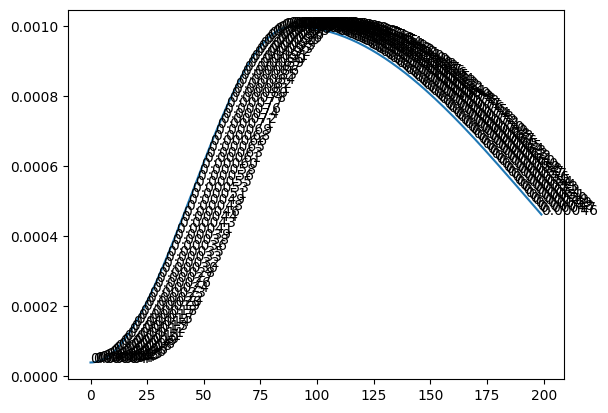

In [124]:
from torch.optim.lr_scheduler import OneCycleLR

model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

scheduler = OneCycleLR(optimizer, 
                       max_lr = 1e-3, # Upper learning rate boundaries in the cycle for each parameter group
                       steps_per_epoch = 15, # The number of steps per epoch to train for. (The len of the data loader)
                       epochs = 20, # The number of epochs to train for.
                       anneal_strategy = 'cos') # Specifies the annealing strategy

learning_rates = []
for i in range(20):
    for i in range(10):
        optimizer.step()
        learning_rates.append(optimizer.param_groups[0]['lr'])
        scheduler.step()
plot_lr(learning_rates)

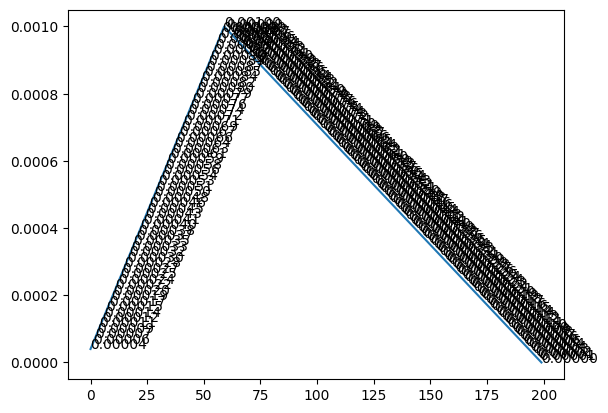

In [126]:
from torch.optim.lr_scheduler import OneCycleLR

model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

scheduler = OneCycleLR(optimizer, 
                       max_lr = 1e-3, # Upper learning rate boundaries in the cycle for each parameter group
                       steps_per_epoch = 10, # The number of steps per epoch to train for. (The len of the data loader)
                       epochs = 20, # The number of epochs to train for.
                       anneal_strategy = 'linear') # Specifies the annealing strategy

learning_rates = []
for i in range(20):
    for i in range(10):
        optimizer.step()
        learning_rates.append(optimizer.param_groups[0]['lr'])
        scheduler.step()
plot_lr(learning_rates)

# ReduceLROnPlateauLR
The ReduceLROnPlateau reduces the learning rate by when the metric has stopped improving. As you can guess, this is difficult to visualize because the learning rate reduction timing depends on your model, data, and hyperparameters.

#  Custom Learning Rate Schedulers with Lambda Functions

If the built-in learning rate schedulers don’t fit your needs, you have the possibility to define a scheduler with lambda functions. The lambda function is a function that returns a multiplicative factor based on the epoch value.

The LambdaLR adjusts the learning rate by applying the multiplicative factor from the lambda function to the initial LR.


Sets the learning rate of each parameter group to the initial lr times a given function. When last_epoch=-1, sets initial lr as lr.

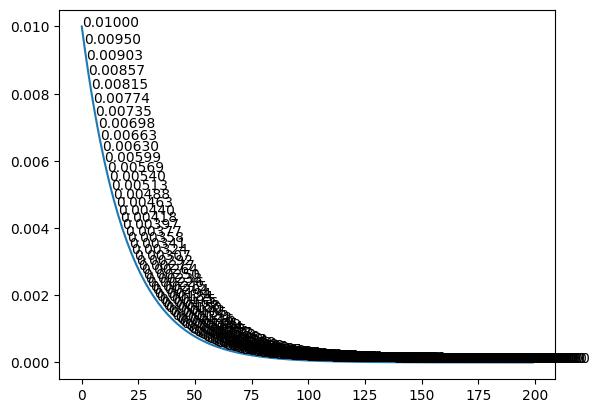

In [131]:
from torch.optim.lr_scheduler import LambdaLR

model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# Assuming optimizer has two groups.
lambda1 = lambda epoch: epoch // 30
lambda2 = lambda epoch: 0.95 ** epoch
scheduler = LambdaLR(optimizer, lr_lambda=[lambda2])

learning_rates = []
for i in range(20):
    for i in range(10):
        optimizer.step()
        learning_rates.append(optimizer.param_groups[0]['lr'])
        scheduler.step()
plot_lr(learning_rates)